# Sesión 3

## 1. Repaso de probabilidad (parte 2)

### 1.1. Variables aleatorias

Las variables aleatorias son funciones que asignan un valor numérico a cada resultado de un experimento aleatorio. Se clasifican en dos tipos:

* **Variables aleatorias discretas**
* **Variables aleatorias continuas**

#### Variables aleatorias discretas

```{admonition} Definición
:class: note

Sea $\Omega$ un espacio muestral discreto, es decir, un conjunto finito o numerable de posibles resultados de un experimento aleatorio.

Una variable aleatoria discreta es una función que asigna un número real a cada elemento de $\Omega$:

$$
X: \Omega \to \mathbb{R}
$$

Es decir, toma un resultado del experimento aleatorio y lo traduce a un número real que nos interesa analizar o interpretar.
```

##### ¿por qué usamos variables aleatorias?

Cuando trabajamos con variables aleatorias, no nos enfocamos directamente en los resultados del experimento (como obtener un 3 y un 5 al lanzar dos datos), sino en _alguna cantidad derivada_ de esos resultados: una suma, una ganacia, un conteo, etc.

Esto nos permite:

- Modelar situaciones de forma numérica.
- Usar herramientas matemáticas para analizar fenómenos aleatorios.
- Calcular cantidades como la probabilidad de éxito, el valor esperado o la variabilidad de un resultado.

**Ejemplo**

Supongamos que lanzamos dos dados. El espacio mestral es:

$$
\Omega = \{(i,j): i,j=1, 2, \dots, 6\}.
$$

Este conjunto tiene 36 posibles pares ordenados, y si los dados son justos, cada uno tiene la misma probabilidad:

$$p(i, j) = \frac{1}{36}$$

Ahora, supongamos el siguiente juego:

- Ganas $500 si la suma de los datos es 7.
- Pierdes $100 en cualquier otro caso.

Podemos **definir una variable aleatoria discreta $X(i, j)$** que represente la ganacia del juego:

$$
X(i,j) = \left\lbrace
\begin{array}{lc}
500  &  \text{si } i+j=7 \\
-100 &  \text{si } i+j\neq7
\end{array}
\right .
$$

```{admonition} Interpretación
:class: tip

Esta **variable aleatoria** convierte los resultados del experimento (el lanzamiento de los dados) en una cantidad que nos interesa: la ganancia o pérdida en el juego.

Así, en lugar de analizar directamente los pares $(i, j)$, analizamos el _comportamiento_ de $X$, que ya resume lo que queremos estudiar.
```

#### 1.1.1. Función de _masa_ de probabilidad (PMF)

Una vez que tenemos una variable aleatoria discreta $X$, queremos saber con qué probabilidad toma cada uno de sus posibles valores.

Para eso usamos la función de masa de probabilidad o PMF _(Probability Mass Function)_.

##### ¿qué hace la PMF?

La PMF asigna una probabilidad a cada valor posible que puede tomar la variable aleatoria.

En otras palabras:

> La PMF mapea cada valor real que puede tomar $X$ al número entre 0 y 1 que representa su **probabilidad**.

![](../images/PMF.png)

#### 1.1.2. Función de distribución acumulada (CDF)

La función de distribución acumulada —conocida como CDF _(Cumulative Distribution Function)_— es una forma alternativa de describir una variable aleatoria discreta $X$.

##### ¿qué hace la CDF?

La CDF asigna a cada valor $x$ la probabilidad de que la variable aleatoria $X$ tome un valor **menor o igual** a $x$.


![](../images/CMF.png)

```{admonition} Propiedades de la CDF
:class: note

- $F(x)$ es **monótona no decreciente**: nunca baja.

- $0 \leq F(x) \leq 1$.

- $\lim_{x \to \infty} F(x) = 1$.

- $\lim_{x \to -\infty} F(x) = 0$.
```

Consideramos el tiro de un solo dado. El dado está cargado, de modo que solo salen los valores $1$, $5$ y $6$, y de modo que la función de probabilidad sea:
$$
f(X) = \left\{\begin{array}{cc }0.3 & X=1 \\ 0.3 & X=5 \\ 0.4 & X=6\end{array}\right.
$$

In [1]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# definir listas de valores de X y probabilidades
xk = [1, 5, 6]
pk = [0.3, 0.3, 0.4]

In [3]:
# se define una variable aleatoria discreta
X = stats.rv_discrete(name='X', values=(xk, pk))

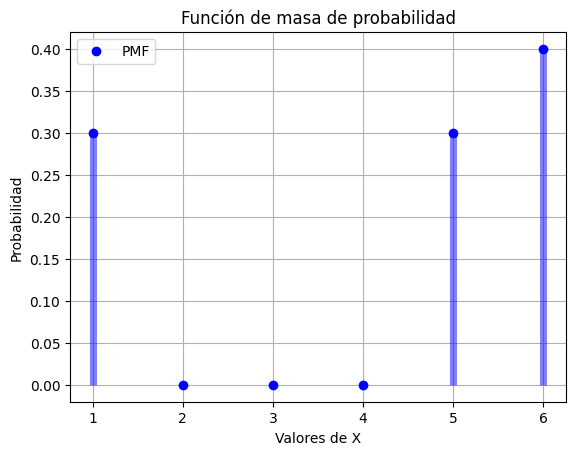

In [4]:
x = range(1,7)
y = X.pmf(x)

plt.plot(x, y, 'bo', label='PMF')
plt.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)
plt.title('Función de masa de probabilidad')
plt.xlabel('Valores de X')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid()
plt.show()

Como tabla, siguiendo el ejemplo de los dados:

$$
F(X) = p(X \leq x).
$$

| x      | 1   | 2   | 3   | 4   | 5   | 6   |
| ------ | --- | --- | --- | --- | --- | --- |
| p(X=x) | 0.3 | 0   | 0   | 0   | 0.3 | 0.4 |
| F(x)   | 0.3 | 0.3 | 0.3 | 0.3 | 0.6 | 1   |

```{admonition} OJO
:class: warning

Es fácil notar que:

- $(0 \leq p(a) \leq 1)$
- $(x)$ puede ser cualquier número. Si $(x)$ es un valor que $(X)$ nunca toma, entonces $(p(x) = 0)$.

🔸 La **primera afirmación aplica tanto para la PMF como para la CDF**:
Ambas funciones siempre devuelven valores entre 0 y 1.

🔸 La **segunda afirmación aplica solo para la PMF**:
La CDF $(F(x) = \mathbb{P}(X \leq x))$ puede ser mayor que 0 incluso si $(X)$ nunca toma el valor exacto $(x)$, porque **acumula** las probabilidades de los valores menores o iguales a $(x)$.
```

Recapitulando, tenemos:

| **Concepto**            | **Palabra clave**           | **¿Qué representa?**                              |
| ----------------------- | --------------------------- | ------------------------------------------------- |
| Espacio muestral        | “Todo lo posible y medible” | Todas las salidas del experimento                 |
| Función de probabilidad | “Peso”                      | Cuán probable es cada resultado                   |
| Variable aleatoria      | “Traducción”                | Asocia un número a cada resultado del experimento |
| Distribución            | “Comportamiento”            | Cómo se reparten los valores que genera $(X)$     |